## Aprendizaje por Refuerzo 2
### Carrera de Especialización en Inteligencia Artificial - FIUBA

### Trabajo Final

### 4º Bimestre 2025

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |

## Reinforced Learning aplicado a stock trading: Ensamble de agentes

https://github.com/bdesia/TradingAgent.git

### 1. DESCRIPCIÓN DEL DESAFÍO

Se presenta la implementación de varios **agentes** entrenados mediante técnicas de Reinforcement Learning (RL), para la toma de decisiones en el contexto del trading de acciones. Este proyecto busca demostrar la aplicación práctica de RL en un entorno financiero dinámico, donde el agente debe aprender a maximizar su rentabilidad a través de la interacción con un mercado simulado a partir de datos históricos.

Se entrenarán diversos agentes utilizando PPO, A2C, DDPG, SAC y TD3 utilizando la librería **stable baselines 3**. A partir de estos, se hará un modelo ensamblado promediando los resultados de cada agente.

El objetivo principal es desarrollar un agente capaz de tomar decisiones óptimas de inversión (hold, buy or sell) en un mercado de acciones, basándose únicamente en la observación de datos históricos de precios y un conjunto de indicadores técnicos. Este entorno financiero presenta desafíos como la volatilidad de los precios, las comisiones de transacción, el spread de compra/venta y la necesidad de gestionar un capital limitado. El agente utiliza RL para aprender una política óptima mediante la exploración y explotación, ajustándose a patrones no lineales y adaptándose a cambios en el mercado sin requerir suposiciones previas sobre la distribución de los datos.

El entorno ha sido diseñado de forma personalizada utilizando la librería Gymnasium. Este entorno simula un mercado de acciones con datos históricos de precios de cierre, integrando variables como el saldo disponible, las acciones en posesión y un conjunto de indicadores técnicos (e.g., medias móviles, RSI). El agente recibe recompensas basadas en la variación de su patrimonio neto, con penalizaciones por inactividad, incentivando así un comportamiento estratégico y eficiente.

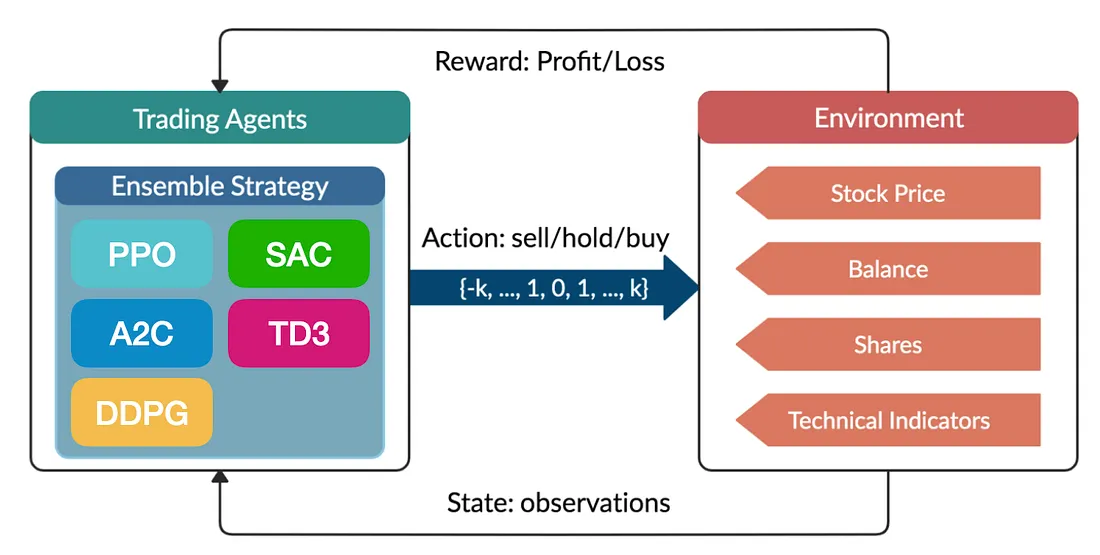

### 2. IMPLEMENTACIÓN

#### 2.1 DATA

El primer paso implica descargar los datos necesarios. Especificamente, el trabajo se basará en el Dow Jones 30, una lista con las 30 acciones más preponderantes. Se utiliza Yahoo Finances para descargar los datos históricos. Se descargan desde el 1° de enero de 2009 hasta el 8 mayo de 2020. Se crea un diccionario para almacenar la data y tener acceso de forma eficiente y organizada.

In [1]:
from datetime import date
from utils import download_ticker

# List of stocks to download data for
tickers_list = [
    'AAPL', 'AVGO', 'INTC',  'ORCL',
        ]

tickers_list = [
    'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
]
tickers_list.remove('DOW')
tickers_list.remove('UTX')

# today_str = date.today().strftime('%Y-%m-%d')
# start_str ='2015-10-17'

data = {}
for ticker in tickers_list:
    print(f"Downloading data for {ticker}...")
    data[ticker] = download_ticker(ticker, start = '2009-01-01', end = '2020-05-08', filename = f'{ticker}_stock_data.csv')
    print(f"Data for {ticker} downloaded successfully.")
    print("-" * 40)


C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for MMM downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for AXP downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for AAPL downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for BA downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for CAT downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for CVX downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for CSCO downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for KO downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for DIS downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for GS downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for HD downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for IBM downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for INTC downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for JNJ downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for JPM downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for MCD downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for MRK downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for MSFT downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for NKE downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for PFE downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for PG downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for TRV downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for UNH downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for VZ downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for V downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for WBA downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed
C:\Users\Braian\OneDrive\Escritorio\GitHub\CEIA\ReinforcedLearning\TradingAgent\src\utils.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)


Data for WMT downloaded successfully.
----------------------------------------


[*********************100%***********************]  1 of 1 completed

Data for XOM downloaded successfully.
----------------------------------------


A los efectos de asegurar que nuestro modelo es robusto y generaliza, dividimos los datos en tres conjuntos diferentes: train, validation y test. Dado que se trata de una serie de tiempo, se respeta la cronología de datos en la división del set asegurando que el agente se evalúe en datos "futuros" no vistos durante el entrenamiento.

- Training data shape for INTC: (1762, 5)
- Validation data shape for INTC: (252, 5)
- Test data shape for INTC: (842, 5)



Price,Close,High,Low,Open,Volume
Ticker,INTC,INTC,INTC,INTC,INTC
Date,,,,,
2009-01-02,9.516946,9.548252,9.059882,9.197627,52208200
2009-01-05,9.335377,9.573301,9.272766,9.435555,57320400
2009-01-06,9.623393,9.711049,9.441820,9.448081,61631400
2009-01-07,9.041102,9.429294,8.978491,9.260243,131389200
2009-01-08,9.109975,9.122497,8.922140,9.047363,63101600


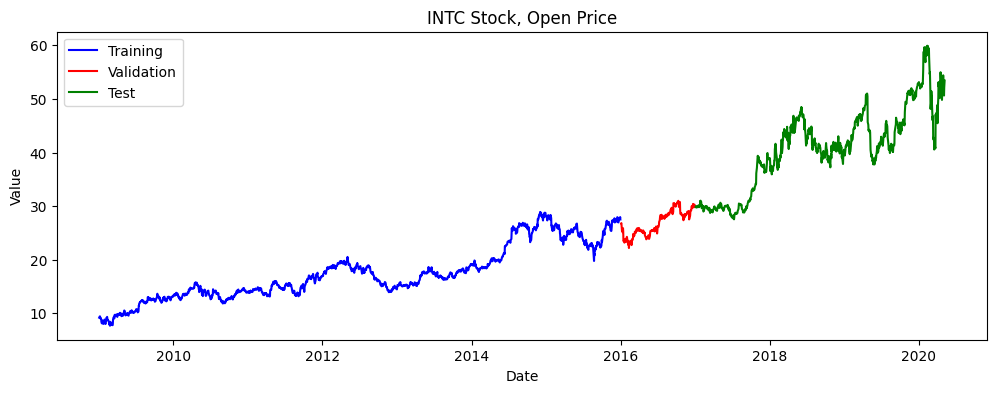

In [ ]:
import matplotlib.pyplot as plt

# split the data into training, validation and test sets
training_data_time_range = ('2009-01-01', '2015-12-31')
validation_data_time_range = ('2016-01-01', '2016-12-31')
test_data_time_range = ('2017-01-01', '2020-05-08')

# split the data into training, validation and test sets
training_data = {}
validation_data = {}
test_data = {}

for ticker, df in data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]
    validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]

# print shape of training, validation and test data
ticker = 'INTC'
print(f'- Training data shape for {ticker}: {training_data[ticker].shape}')
print(f'- Validation data shape for {ticker}: {validation_data[ticker].shape}')
print(f'- Test data shape for {ticker}: {test_data[ticker].shape}\n')

# Display the first 5 rows of the data
display(data[ticker].head())
print('\n')

# Plot:
plt.figure(figsize=(12, 4))
plt.plot(training_data[ticker].index, training_data[ticker]['Open'], label='Training', color='blue')
plt.plot(validation_data[ticker].index, validation_data[ticker]['Open'], label='Validation', color='red')
plt.plot(test_data[ticker].index, test_data[ticker]['Open'], label='Test', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{ticker} Stock, Open Price')
plt.legend()
plt.show()

#### 2.2  DATA ENRICHMENT

Enriquecemos el dataset incorporando algunos indicadores técnicos de amplio uso en estrategias de trading:

- MACD (Moving Average Convergence Divergence): implica el cómputo de las medias móviles exponenciales (EMAs) 12 y 26 para determinar la linea MACD, y luego aplica la EMA de 9 días a la línea MACD para generar la línea Señal. Tanto la MACD como la Señal ayudan a identificar potenciales señales de compra o venta basadas en sus cruces.

- RSI (Relative Strength Index): Se calcula el RSI a 14 días para capturar el momentum del movimiento de precios. Este indicador sirbe para identificar sobrecompra o sobreventa a partir de medir la velocidad y cambio en los precios.

- CCI (Commodity Channel Index): Se utiliza como medida para valorar la desviación de un precio respecto de su promedio, ayuda a identificar nuevas tendencias o condiciones extremas. Se usa una ventana de 20 días.

- ADX (Average Directional Index): Se utiliza para medir la fuerta de una tendencia. Utilizamos una ventana de 14 días.

Agregando esos indicadores, transformamos nuestro dataset crudo en uno enriquecido que tiene features capaz de capturar tendencias y dinámica de precidos. Este dataset mejorado es empleado para entrenar el modelo.

In [3]:
import numpy as np
import pandas as pd

def add_technical_indicators(df, rsi_period=14, cci_period=20, adx_period=14):
    """Calcula indicadores técnicos (MACD, RSI, CCI, ADX) con períodos dados"""

    df = df.copy()

    # Calculate EMA 12 and 26 for MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate RSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
   
    # Calculate CCI
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=cci_period).mean()
    mean_dev = tp.rolling(window=cci_period).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)
    
    # Calculate ADX
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], 
                    np.abs(df['High'] - df['Close'].shift(1)), 
                    np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=adx_period, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=adx_period, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=adx_period, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=adx_period, adjust=False).mean()

    # Keep only the required columns
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    # Drop NaN values
    df.dropna(inplace=True)

    return df

In [4]:
# add technical indicators to the training data for each stock
for ticker, df in training_data.items():
    training_data[ticker] = add_technical_indicators(df)

# add technical indicators to the validation data for each stock
for ticker, df in validation_data.items():
    validation_data[ticker] = add_technical_indicators(df)

# add technical indicators to the test data for each stock
for ticker, df in test_data.items():
    test_data[ticker] = add_technical_indicators(df)

ticker = 'INTC'
# print the first 5 rows of the data
print(f'- Training data shape for {ticker}: {training_data[ticker].shape}')
print(f'- Validation data shape for {ticker}: {validation_data[ticker].shape}')
print(f'- Test data shape for {ticker}: {test_data[ticker].shape}\n')

display(test_data[ticker].head())

- Training data shape for INTC: (1743, 10)
- Validation data shape for INTC: (233, 10)
- Test data shape for INTC: (823, 10)



Price,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
Ticker,INTC,INTC,INTC,INTC,INTC,,,,,
Date,,,,,,,,,,
2017-01-31,30.385938,30.508394,29.912432,30.059381,27059100,0.174708,0.142681,53.211114,0.777599,38.500118
2017-02-01,30.059384,30.165515,29.406275,29.814468,28380600,0.118263,0.137797,44.941187,-77.780139,36.628242
2017-02-02,29.602207,29.961419,29.553226,29.945091,31916900,0.083112,0.126860,49.640358,-72.736647,32.499159
2017-02-03,30.167083,30.273972,29.969753,30.027308,21038100,0.061183,0.113725,49.889195,-17.763502,32.069811
2017-02-06,30.019086,30.019086,29.723091,29.821756,21427000,0.026908,0.096361,46.942286,-72.430708,31.697709


#### 2.3 ENVIRONMENT SETUP

Para la generación del ambiente personalizado, se define una clase personalizada `TradingEnv` que hereda de `gym.Env`. Los parámetros principales incluyen:

- **Initialization**: el entorno se inicia con datos históricos de acciones y configura diversos parámetros, incluyendo los espacios de acciones y observaciones, costos de transacción y variables de la cuenta, como saldo, patrimonio neto y acciones en posesión.

- **Observation Space**: en cada paso, el entorno proporciona un estado completo que incluye los precios actuales de las acciones, saldo de la cuenta, acciones en posesión, patrimonio neto y otras métricas relevantes. Este espacio de observación es crucial para que el agente tome decisiones informadas.

- **Action Space**: el espacio de acción se define como un espacio continuo donde el agente puede decidir la proporción de la cartera para comprar o vender de cada acción. Los valores positivos representan acciones de compra, mientras que los valores negativos representan acciones de venta.

- **Step Function**: ejecuta las acciones del agente, actualiza el saldo de la cuenta y las acciones en posesión, calcula el nuevo patrimonio neto y determina la recompensa. También gestiona los costos de transacción y verifica si el episodio debe finalizarse según el número máximo de pasos o si el patrimonio neto cae por debajo de cero.

- **Rendering**: proporciona una salida comprensible del estado actual, incluyendo el número de pasos, saldo, acciones en posesión, patrimonio neto y ganancias.

- **Reset**: reconfigura el entorno para un nuevo episodio, asegurando que el agente comience con las condiciones iniciales y los datos correspondientes.

Este entorno personalizado está diseñado para simular de manera cercana escenarios de comercio en el mundo real, proporcionando al agente de aprendizaje por refuerzo las herramientas necesarias para aprender y optimizar estrategias de inversión.

In [5]:
import gymnasium as gym
from gymnasium import spaces
import gymnasium.utils.seeding as seeding

class StockTradingEnv(gym.Env):

    metadata = {'render_modes': ['human']}

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def __init__(self, stock_data, transaction_cost_percent=0.005):
        super(StockTradingEnv, self).__init__()
        """
        This function initializes the environment with stock data and sets up necessary variables:
        - Action and Observation Space: Defines the action space (buy/sell/hold) and
                                        observation space (stock prices, balance, shares held, net worth, etc.).
        - Account Variables: Initializes balance, net worth, shares held, and transaction costs.
        """

        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All provided stock data is empty")

        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)

        # Observation space: price data for each stock + balance + shares held + net worth + max net worth + current step
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        # Initialize account balance
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}

        # Set the current step
        self.current_step = 0

        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Transaction cost
        self.transaction_cost_percent = transaction_cost_percent

        # Short Strategy
        self.short = False

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        """ Resets the environment to its initial state for a new episode. """

        # Reset the account balance
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def _next_observation(self):
        """ Returns the current state of the environment, including stock prices, balance, shares held, net worth, etc. """

        # initialize the frame
        frame = np.zeros(self.obs_shape)

        # Add stock data for each ticker
        idx = 0
        # Loop through each ticker
        for ticker in self.tickers:
            # Get the DataFrame for the current ticker
            df = self.stock_data[ticker]
            # If the current step is less than the length of the DataFrame, add the price data for the current step
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            # Otherwise, add the last price data available
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            # Move the index to the next ticker
            idx += self.n_features

        # Add balance, shares held, net worth, max net worth, and current step
        frame[-4-len(self.tickers)] = self.balance # Balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers] # Shares held
        frame[-3] = self.net_worth # Net worth
        frame[-2] = self.max_net_worth # Max net worth
        frame[-1] = self.current_step # Current step

        return frame

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def step(self, actions):
        """ Executes an action in the environment, updates the state, calculates rewards, and checks if the episode is done. """

        # Update the current step
        self.current_step += 1

        # Check if we have reached the maximum number of steps
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}

        close_prices = {}

        # Loop through each ticker and perform the action
        for i, ticker in enumerate(self.tickers):

            # Get the current open and close price of the stock
            current_day = self.stock_data[ticker].iloc[self.current_step]
            open_price = current_day['Open'].item()
            close_price = current_day['Close'].item()

            # Record the close price
            close_prices[ticker] = close_price

            # Get the action for the current ticker
            action = actions[i]

            action_price = open_price if self.short else close_price

            if action > 0:  # Buy
                # Calculate the number of shares to buy
                shares_to_buy = int(self.balance * action / action_price)
                # Calculate the cost of the shares
                cost = shares_to_buy * action_price
                # Transaction cost
                transaction_cost = cost * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance -= (cost + transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] += shares_to_buy

            elif action < 0:  # Sell
                # Calculate the number of shares to sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                # Calculate the sale value
                sale = shares_to_sell * action_price
                # Transaction cost
                transaction_cost = sale * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance += (sale - transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] -= shares_to_sell
                # Update the shares sold
                self.total_shares_sold[ticker] += shares_to_sell
                # Update the total sales value
                self.total_sales_value[ticker] += sale

        # Calculate the net worth
        self.net_worth = self.balance + sum(self.shares_held[ticker] * close_prices[ticker] for ticker in self.tickers)
  
        # Update the max net worth
        self.max_net_worth = max(self.net_worth, self.max_net_worth)

        # Calculate the reward
        reward = self.net_worth - self.initial_balance

        # Check if the episode is done
        done = self.net_worth <= 0 or self.current_step >= self.max_steps

        obs = self._next_observation()

        return obs, reward, done, False, {}

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def render(self, mode='human'):
        """ Displays the current state of the environment in a human-readable format. """

        # Print the current step, balance, shares held, net worth, and profit
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        """ Placeholder for any cleanup operations """
        pass

#### 2.4 REINFORCED LEARNING MODELS


Como se mencionó al principio, aplicamos diferentes agentes para interactuar con el entorno de trading definido previamente. Cada agente se basa en algoritmos de RL diferentes y, finalmente, un agente ensamblado combina las fortaleza de los modelos individuales.

Los agentes base son:

- `PPOAgent` (Proximal Policy Optimization)
- `A2CAgent` (Advantage Actor-Critic)
- `DDPGAgent` (Deep Deterministic Policy Gradient)
- `SACAgent` (Soft Actor-Critic)
- `TD3Agent` (Twin Delayed Deep Deterministic Policy Gradient)

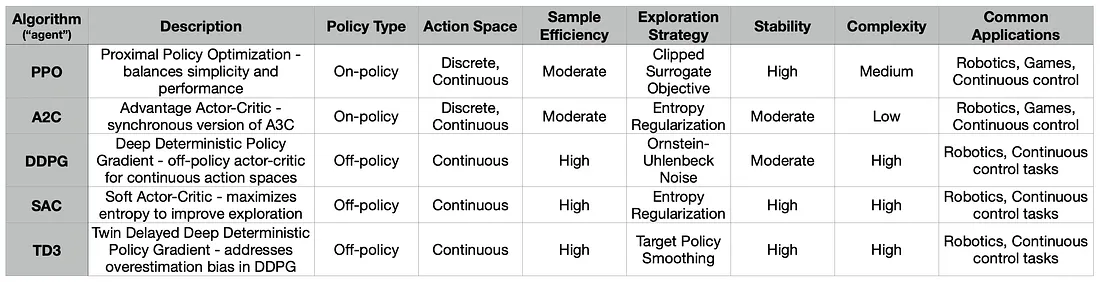

In [6]:
from stable_baselines3 import PPO, A2C, DDPG, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import BaseCallback

In [7]:
class PolicyGradientLossCallback(BaseCallback):
    """
    A custom callback class that logs the policy_gradient_loss during training.
    This class extends BaseCallback and used to capture and store the metrics we want.
    """

    def __init__(self, verbose=0):
        super(PolicyGradientLossCallback, self).__init__(verbose)
        self.losses = []

    def _on_step(self) -> bool:
        if hasattr(self.model, 'logger'):
            logs = self.model.logger.name_to_value
            if 'train/policy_gradient_loss' in logs:
                loss = logs['train/policy_gradient_loss']
                self.losses.append(loss)
        return True

    def _on_training_end(self):
        """ Plot the loss after training ends """
        name = self.model.__class__.__name__
        plt.figure(figsize=(12, 4))
        plt.plot(self.losses, label='Policy Gradient Loss')
        plt.title(f'{name} - Policy Gradient Loss During Training')
        plt.xlabel('Training Steps')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [8]:
# Define PPO Agent
class PPOAgent:

    def __init__(self, env, total_timesteps, threshold):
        self.model = PPO("MlpPolicy", env, verbose=0)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)
        self.threshold = threshold

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def predict(self, obs):
        action, _ = self.model.predict(obs, deterministic=True)
        return action

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def action_to_recommendation(self, action):
        recommendations = []
        for a in action:
            if a > self.threshold:
                recommendations.append('buy')
            elif a < -self.threshold:
                recommendations.append('sell')
            else:
                recommendations.append('hold')
        return recommendations

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def validate(self, env):
        obs = env.reset()
        total_rewards = 0
        for _ in range(1000):  # Adjust based on needs
            action, _ = self.model.predict(obs)
            obs, reward, done, _ = env.step(action)
            total_rewards += reward
            if done:
                obs = env.reset()
        print(f'Agent Validation Reward: {total_rewards}')

# -----------------------------------------------------------------------------

# Define A2C Agent
class A2CAgent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = A2C("MlpPolicy", env, verbose=0)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define DDPG Agent
class DDPGAgent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = DDPG("MlpPolicy", env, verbose=0)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define SAC Agent
class SACAgent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = SAC("MlpPolicy", env, verbose=0)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define TD3 Agent
class TD3Agent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = TD3("MlpPolicy", env, verbose=0)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define Ensemble Agent
class EnsembleAgent:

    def __init__(self, ppo_model, a2c_model, ddpg_model, sac_model, td3_model, threshold):
        self.ppo_model = ppo_model
        self.a2c_model = a2c_model
        self.ddpg_model = ddpg_model
        self.sac_model = sac_model
        self.td3_model = td3_model
        self.threshold = threshold

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def predict(self, obs):
        ppo_action, _ = self.ppo_model.predict(obs, deterministic=True)
        a2c_action, _ = self.a2c_model.predict(obs, deterministic=True)
        ddpg_action, _ = self.ddpg_model.predict(obs, deterministic=True)
        sac_action, _ = self.sac_model.predict(obs, deterministic=True)
        td3_action, _ = self.td3_model.predict(obs, deterministic=True)

        # Average the actions
        ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action, sac_action, td3_action], axis=0)
        return ensemble_action

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def action_to_recommendation(self, action):
        recommendations = []
        for a in action:
            if a > self.threshold:
                recommendations.append('buy')
            elif a < -self.threshold:
                recommendations.append('sell')
            else:
                recommendations.append('hold')
        return recommendations

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def validate(self, env):
        obs = env.reset()
        total_rewards = 0
        for _ in range(1000):  # Adjust based on needs
            action = self.predict(obs)
            obs, reward, done, _ = env.step(action)
            total_rewards += reward
            if done:
                obs = env.reset()
        print(f'Agent Validation Reward: {total_rewards}')

In [9]:
# Function to create the environment and train the agents
def create_env_and_train_agents(train_data, val_data, total_timesteps, threshold):

    # Create environments for training and validation
    train_env = DummyVecEnv([lambda: StockTradingEnv(train_data)])
    val_env = DummyVecEnv([lambda: StockTradingEnv(val_data)])

    # Train and Validate PPO Agent
    ppo_agent = PPOAgent(train_env, total_timesteps, threshold)
    ppo_agent.validate(val_env)

    # Train and Validate A2C Agent
    a2c_agent = A2CAgent(train_env, total_timesteps, threshold)
    a2c_agent.validate(val_env)

    # Train and Validate DDPG Agent
    ddpg_agent = DDPGAgent(train_env, total_timesteps, threshold)
    ddpg_agent.validate(val_env)

    # Train and Validate SAC Agent
    sac_agent = SACAgent(train_env, total_timesteps, threshold)
    sac_agent.validate(val_env)

    # Train and Validate TD3 Agent
    td3_agent = TD3Agent(train_env, total_timesteps, threshold)
    td3_agent.validate(val_env)

    # Train and Validate the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model,
                                   sac_agent.model, td3_agent.model, threshold)
    ensemble_agent.validate(val_env)

    return train_env, val_env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent

# -----------------------------------------------------------------------------

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers,
                        show_balance=True, show_net_worth=True, show_shares_held=True):

    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):

    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# -----------------------------------------------------------------------------

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):

    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# -----------------------------------------------------------------------------

def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    """ Test a single agent and track performance metrics, with an option to visualize the results """

    # Initialize metrics tracking
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()}
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):

        metrics['steps'].append(i)

        action = agent.predict(obs)

        obs, rewards, dones, infos = env.step(action)

        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()

    return metrics

# -----------------------------------------------------------------------------

def test_and_visualize_agents(env, agents, data, n_tests=1000):

    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, data, n_tests=n_tests, visualize=True)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

# -----------------------------------------------------------------------------

def compare_and_plot_agents(agents_metrics, labels, risk_free_rate=0.0):

    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:

            net_worths = metrics['net_worths']

            # Calculate daily returns
            daily_returns = np.diff(net_worths) / net_worths[:-1]
            avg_return = np.mean(daily_returns)
            std_return = np.std(daily_returns)
            sharpe_ratio = ((avg_return - risk_free_rate) / std_return) if std_return != 0 else 'Inf'

            returns.append(avg_return)
            stds.append(std_return)
            sharpe_ratios.append(sharpe_ratio)

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)

    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

#### 2.5 MODELS TRAINING

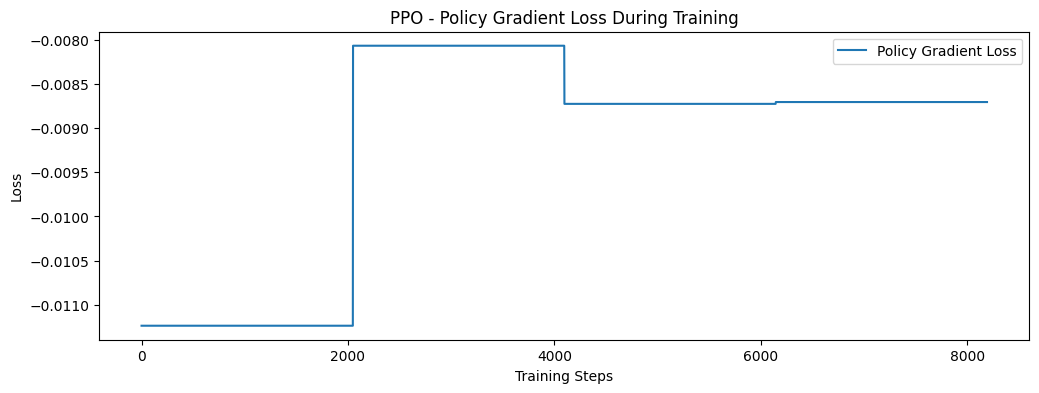

Agent Validation Reward: [-97693.08]


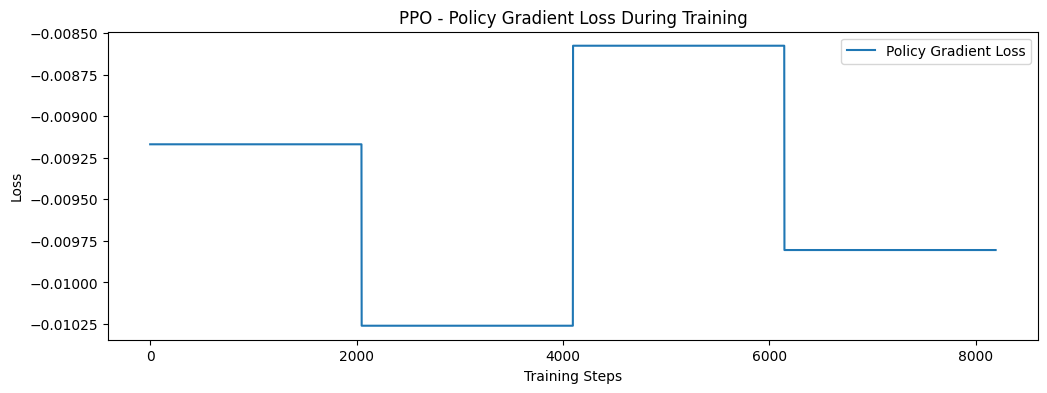

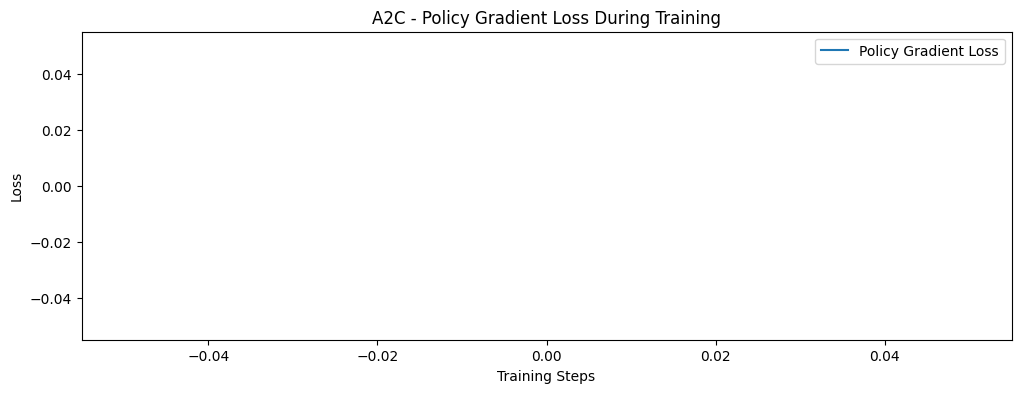

Agent Validation Reward: [107260.22]


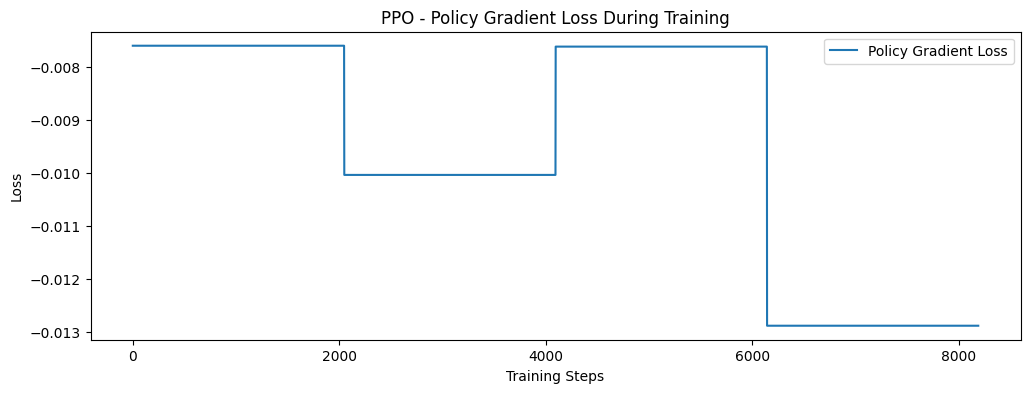

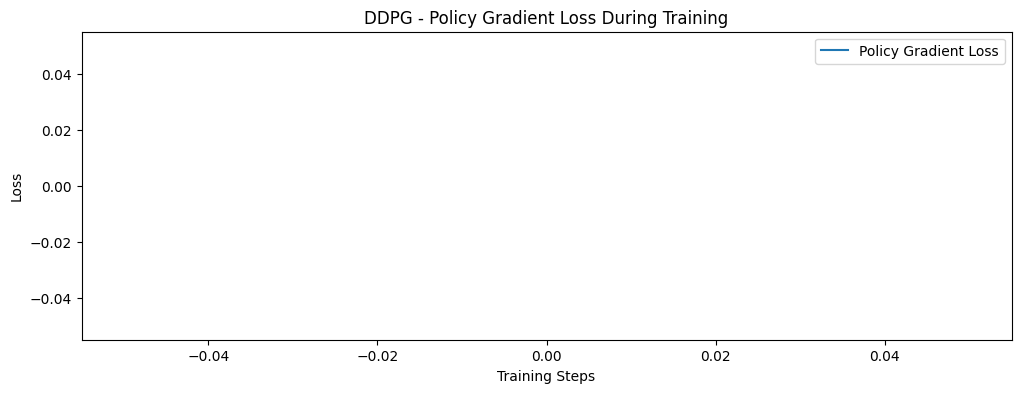

Agent Validation Reward: [160009.5]


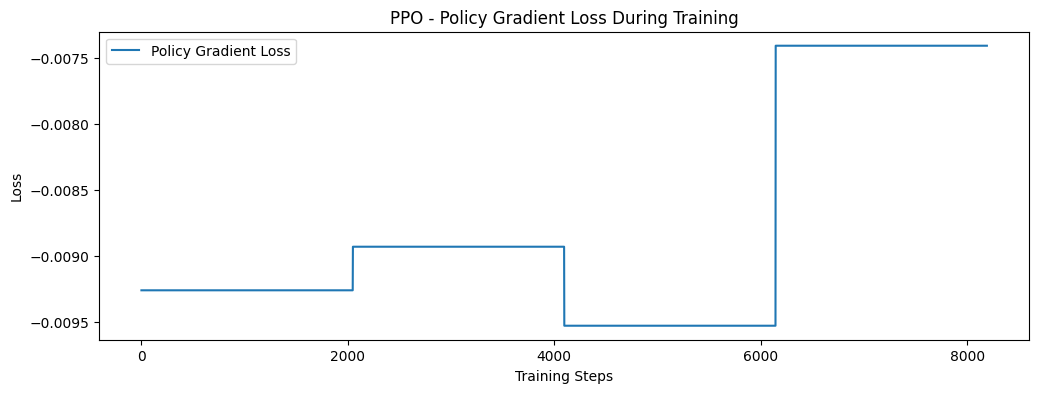

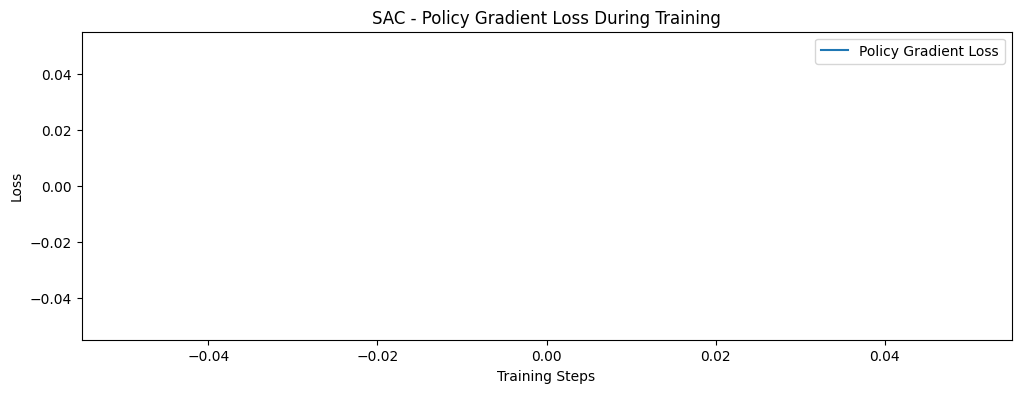

Agent Validation Reward: [160009.5]


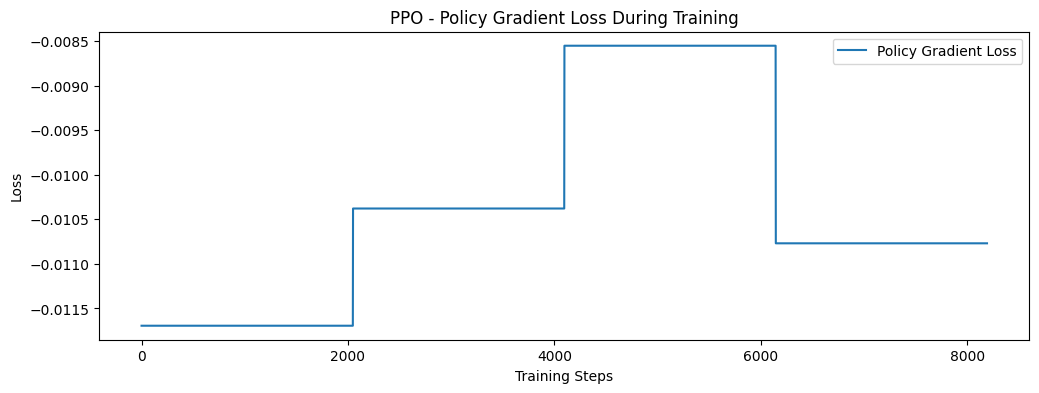

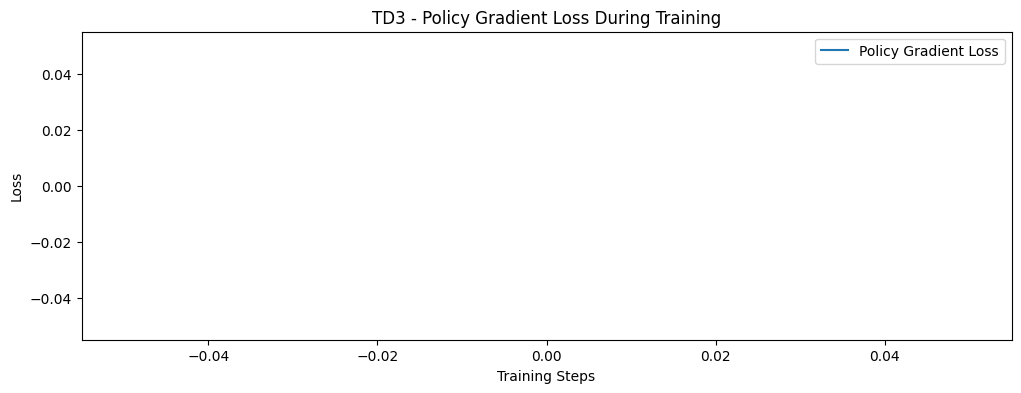

Agent Validation Reward: [160009.5]
Agent Validation Reward: [125159.305]


In [10]:
# Create the environment and train the agents
threshold = 0.1
total_timesteps = 10000
train_env, val_env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent = \
  create_env_and_train_agents(training_data, validation_data, total_timesteps, threshold)

#### 2.6 MODELS TESTING

Testing PPO Agent...


c:\Users\Braian\AppData\Local\pypoetry\Cache\virtualenvs\tradingagent-njwG2tzL-py3.11\Lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Testing A2C Agent...
Testing DDPG Agent...
Testing SAC Agent...
Testing TD3 Agent...
Testing Ensemble Agent...


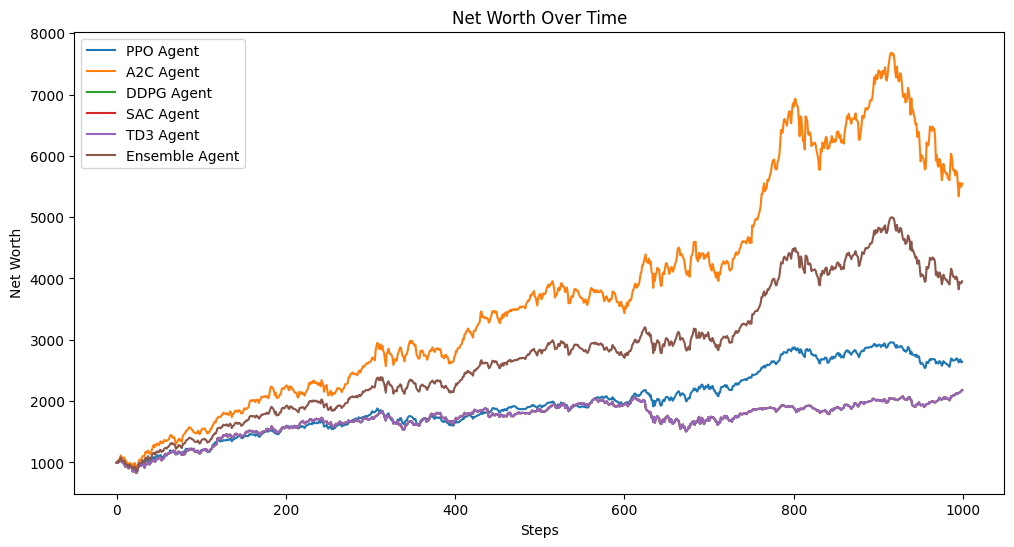

Testing PPO Agent...
Testing A2C Agent...
Testing DDPG Agent...
Testing SAC Agent...
Testing TD3 Agent...
Testing Ensemble Agent...


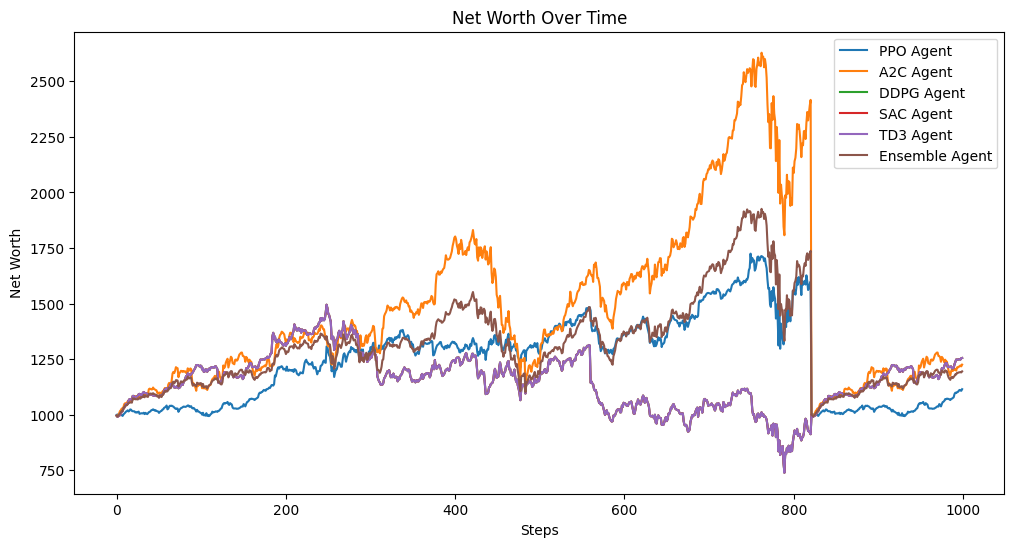

In [11]:
n_tests = 1000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent,
    'Ensemble Agent': ensemble_agent
}

test_and_visualize_agents(train_env, agents, training_data, n_tests=n_tests)

test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])
test_and_visualize_agents(test_env, agents, test_data, n_tests=n_tests)

,Agent,Return,Standard Deviation,Sharpe Ratio
1,A2C Agent,0.000665,0.025758,0.025808
2,DDPG Agent,0.000351,0.015390,0.022836
4,TD3 Agent,0.000351,0.015390,0.022836
3,SAC Agent,0.000351,0.015390,0.022836
5,Ensemble Agent,0.000422,0.020022,0.021059
0,PPO Agent,0.000292,0.017794,0.016433


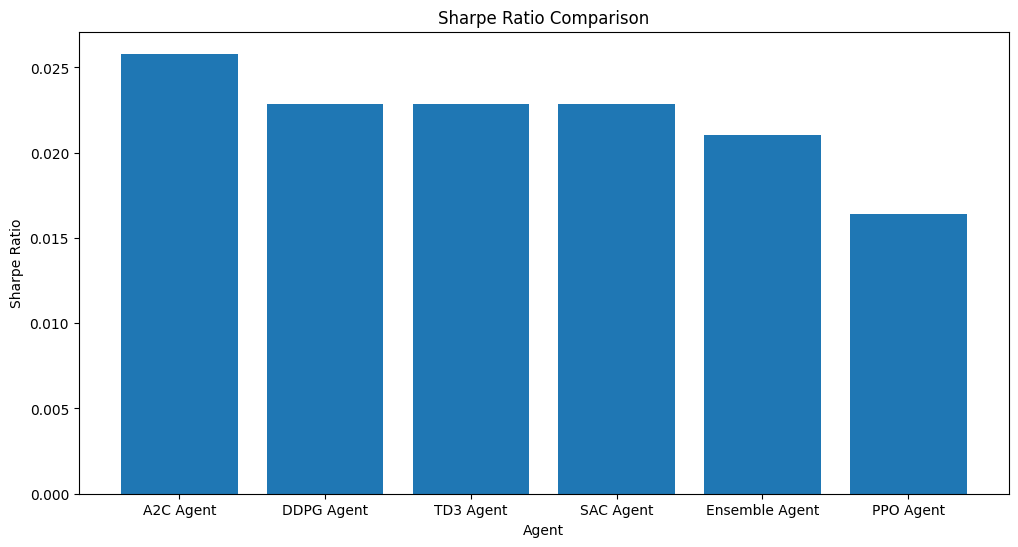

In [12]:
test_agents_metrics = [test_agent(test_env, agent, test_data, n_tests=n_tests, visualize=False) for agent in agents.values()]
compare_and_plot_agents(test_agents_metrics, list(agents.keys()))

In [13]:
def prepare_next_day_data(stock_data):
    """ Prepares the observation for the next trading day """

    # Initialize the environment with the current stock data
    env = StockTradingEnv(stock_data)
    env.reset()

    # Prepare the next day's observation
    next_day_observations = env._next_observation()

    return next_day_observations

# -----------------------------------------------------------------------------

def generate_next_day_recommendations(agents, next_day_observation):
    """ Generate recommendations for the next trading day using the trained agents """

    recommendations = {agent_name: [] for agent_name in agents.keys()}

    for agent_name, agent in agents.items():
        action = agent.predict(next_day_observation)
        recs = agent.action_to_recommendation(action)
        recommendations[agent_name] = zip(recs, action)

    return recommendations

# -----------------------------------------------------------------------------

# Prepare next day's observation
next_day_observation = prepare_next_day_data(test_data)

# Generate recommendations for the next trading day
recommendations = generate_next_day_recommendations(agents, next_day_observation)

# Print or display recommendations
for agent_name, recs in recommendations.items():
  if agent_name == 'Ensemble Agent':
      print(f'\nRecommendations for {agent_name}:')
      for ticker, recommendation in zip(tickers_list, recs):
          print(f"{ticker}: {recommendation}")


Recommendations for Ensemble Agent:
MMM: ('buy', np.float32(0.39035207))
AXP: ('sell', np.float32(-0.3409268))
AAPL: ('buy', np.float32(0.80759555))
BA: ('sell', np.float32(-0.40822953))
CAT: ('hold', np.float32(0.08407073))
CVX: ('hold', np.float32(-0.0058021545))
CSCO: ('hold', np.float32(-0.0054999115))
KO: ('sell', np.float32(-0.81556404))
DIS: ('buy', np.float32(0.8006191))
GS: ('buy', np.float32(0.4029333))
HD: ('hold', np.float32(-0.0029891252))
IBM: ('hold', np.float32(0.007259083))
INTC: ('hold', np.float32(0.023465013))
JNJ: ('hold', np.float32(-0.058852244))
JPM: ('sell', np.float32(-0.2717722))
MCD: ('buy', np.float32(0.20809872))
MRK: ('sell', np.float32(-0.38727805))
MSFT: ('buy', np.float32(0.6753713))
NKE: ('buy', np.float32(0.24173012))
PFE: ('hold', np.float32(0.009753251))
PG: ('sell', np.float32(-0.40212664))
TRV: ('sell', np.float32(-0.39153975))
UNH: ('hold', np.float32(-0.010439659))
VZ: ('hold', np.float32(-0.0059234262))
V: ('sell', np.float32(-0.78987634))
WB

### 3. CONCLUSIONES

Se diseño un entorno completo que captura las particularidades del trading de acciones, incluyendo costos de transacción, observaciones del estado y cálculos de recompensa. Con este entorno, se entrenaron una variedad de agentes de reinforcement learning: PPO, A2C, DDPG, SAC y TD3 — cada uno aportando sus fortalezas únicas a la estrategia de trading. También implementamos un agente en ensamblaje que combina las predicciones de todos los modelos individuales para maximizar el rendimiento y la robustez.

Se observa cómo estos algoritmos avanzados pueden aplicarse a escenarios de trading del mundo real, resaltando su potencial para adaptarse y tomar decisiones informadas basadas en datos de mercado. Los conocimientos adquiridos en este ejercicio no solo muestran el poder del aprendizaje por refuerzo en las finanzas, sino que también enfatizan la importancia de una evaluación rigurosa y la visualización en la valoración del rendimiento de los agentes. Al refinar continuamente nuestros modelos y analizar sus resultados, podemos avanzar hacia estrategias de trading más efectivas y una comprensión más profunda de la dinámica del mercado. 

Trabajos a futuro pueden comprender la ampliación de las variables de estado que el entorno prove al agente, búsqueda de hiperparámetros, cambio del tipo de red de los agentes y la aplicación de un enfoque Mixture of Experts (MoE) para sustituir el Ensemble estático dado por el promedio por un MoE con un gating network dinámico, que adapte los pesos de cada agente según el estado del mercado.
